# Loan Performance Prediction
Now we have been given two datasets. One includes information of customers who have been given a loan in a 6 month period. The other contains every loan that has been given in this time and whether it has been a good loan or a bad loan. Our goal is to identify which new applicants should be given a loan in the future.

- <a href='#Combine Two Datasets Using SQL'>Combine Two Datasets Using SQL</a>
- <a href='#Data'>Data Preprocessing</a>  
    - Missing Values Imputation
    - Dealing with Data Types
- <a href='#Feature'>Feature Engineering</a>
- <a href='#EDA'>Exploratory Data Analysis</a>
    - Outliers Detection
    - Univariate Plots
    - Correlation Heatmap
- <a href='#Algorithm'>Algortihms Selection</a>
    - Logisitc Regression
    - Naive Bayes
    - Support Vector Machine


### Combine Two Datasets Using SQL <a name='Combine Two Datasets Using SQL' />
1.	Save two datasets into csv files separetely
2.	Change format of variable “idLoan” in csv file by using “lower” and “mid” function in Excel
3.	Create new feature “Loans_Num” by indicating number of loans for each customer
4.	Import two files into MySQL Workbench
5.	Use inner join to combine two datasets by customer_id  


### Data Preprocessing <a name='Data' />
1. Read combined csv file into python by pandas. There are 659 observations and 34 features
2. Imputing missing values
3. Dealing with data types

#### Data Introduction

In [2]:
import pandas as pd
loan = pd.read_csv('processed data.csv')
loan.head(10)

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,idLoan,flgGood,Loans_Num
0,0dba6b011d,500,12/27/82,Approved,True,1265,True,10/27/10 14:12,6,True,...,Other,4160,586,527,525,637,592,0dba6b011d,Bad,1
1,96acbba7ed,400,5/9/48,Approved,False,1175,True,10/27/10 19:10,4,True,...,Other,5326,564,526,547,677,598,96acbba7ed,Bad,1
2,289421d82a,500,3/31/89,Approved,False,0,True,10/28/10 07:50,6,True,...,Other,2200,663,501,501,623,531,289421d82a,Bad,1
3,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,Other,1560,614,574,600,656,561,9ece67d6c5,Good,1
4,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,Other,900,708,501,550,651,563,5c2c402094,Bad,1
5,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,Other,1434,687,522,561,661,598,e6254cad30,Good,1
6,ae03151fee,500,6/8/80,Approved,True,190,True,10/30/10 11:53,6,True,...,Other,1200,712,585,663,711,603,ae03151fee,Good,2
7,e55a9a7293,700,3/17/62,Approved,True,750,True,11/4/10 22:34,5,True,...,Other,5260,645,556,556,669,604,e55a9a7293,Bad,1
8,cfe9e0dc5e,800,2/24/61,Approved,False,891,True,11/10/10 23:30,5,True,...,Other,1500,600,622,659,698,656,cfe9e0dc5e,Good,1
9,3744b9845d,500,6/4/60,Approved,False,1172,True,11/15/10 17:14,5,True,...,Other,4191,766,618,623,680,631,3744b9845d,Good,1


In [324]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 34 columns):
customer_id                    659 non-null object
amount_requested               659 non-null int64
birth_date                     659 non-null object
status                         659 non-null object
residence_rent_or_own          659 non-null bool
monthly_rent_amount            659 non-null int64
bank_account_direct_deposit    659 non-null bool
application_when               659 non-null object
loan_duration                  659 non-null int64
payment_ach                    659 non-null bool
num_payments                   659 non-null int64
payment_amount                 659 non-null float64
amount_approved                659 non-null int64
duration_approved              659 non-null int64
payment_amount_approved        637 non-null float64
address_zip                    659 non-null int64
email                          659 non-null object
bank_routing_number            659 non-

#### Missing Values Imputation

In [325]:
loan.apply(lambda x: sum(x.isnull()),axis=0) 

customer_id                      0
amount_requested                 0
birth_date                       0
status                           0
residence_rent_or_own            0
monthly_rent_amount              0
bank_account_direct_deposit      0
application_when                 0
loan_duration                    0
payment_ach                      0
num_payments                     0
payment_amount                   0
amount_approved                  0
duration_approved                0
payment_amount_approved         22
address_zip                      0
email                            0
bank_routing_number              0
email_duration                   0
residence_duration               0
bank_account_duration            1
payment_frequency                0
home_phone_type                  0
other_phone_type               292
how_use_money                    2
monthly_income_amount            0
raw_l2c_score                    0
raw_FICO_telecom                 0
raw_FICO_retail     

In [371]:
# Fill "payment_amount_approved" missing values by multiplying 90% of "payment_amount"
loan['payment_amount_approved'].fillna(loan['payment_amount']*0.9,inplace=True)
loan['payment_amount_approved'].isnull().sum()

0

In [372]:
# Replace missing values in 'other_phone_type' with 'Other' & missing values in 'how_use_money' with 'Other'
loan['other_phone_type'].fillna('Other',inplace=True)
loan['how_use_money'].fillna('Other',inplace=True)

In [373]:
# Replace missing values in 'bank_account_duration' with the mode of the categorical data
loan.bank_account_duration.mode()

0    3+ years
dtype: object

In [374]:
loan['bank_account_duration'].fillna('3+ years',inplace=True)

In [375]:
loan.isnull().sum()

customer_id                    0
amount_requested               0
birth_date                     0
status                         0
residence_rent_or_own          0
monthly_rent_amount            0
bank_account_direct_deposit    0
application_when               0
loan_duration                  0
payment_ach                    0
num_payments                   0
payment_amount                 0
amount_approved                0
duration_approved              0
payment_amount_approved        0
address_zip                    0
email                          0
bank_routing_number            0
email_duration                 0
residence_duration             0
bank_account_duration          0
payment_frequency              0
home_phone_type                0
other_phone_type               0
how_use_money                  0
monthly_income_amount          0
raw_l2c_score                  0
raw_FICO_telecom               0
raw_FICO_retail                0
raw_FICO_bank_card             0
raw_FICO_m

#### Converting Data Types
- Drop unnecessary features
- Convert boolean to int
- Convert Object to catergorical
- Convert categorical to dummy variables

In [376]:
loan.drop(['customer_id','status','application_when','payment_ach',
          'address_zip','bank_routing_number','idLoan'],1,inplace=True)

In [377]:
# Check number of unique categories for each 'object' feature
for col_name in loan.columns:
    if loan[col_name].dtypes == 'object':
        unique_cat = len(loan[col_name].unique())
        print "Feature '{0}' has {1} unique categories".format(col_name,unique_cat)

Feature 'birth_date' has 624 unique categories
Feature 'email' has 643 unique categories
Feature 'email_duration' has 3 unique categories
Feature 'residence_duration' has 4 unique categories
Feature 'bank_account_duration' has 4 unique categories
Feature 'payment_frequency' has 4 unique categories
Feature 'home_phone_type' has 3 unique categories
Feature 'other_phone_type' has 4 unique categories
Feature 'how_use_money' has 14 unique categories
Feature 'flgGood' has 2 unique categories


In [378]:
# Although, 'how_use_money' has a lot of unique categories, most categories only have a few observation
loan.how_use_money.value_counts().sort_values(ascending=False)

Other                             343
Bills (General)                    87
Bills                              63
Bills (Auto)                       49
Bills (Medical)                    32
Car                                29
Bills (Home / Utilities)           17
Pay off loans / overdrawn acct     11
Medical                            10
School                              5
Rent                                5
Rent / Mortgage                     4
Gifts / Leisure                     3
Won't say                           1
Name: how_use_money, dtype: int64

In [379]:
# Bucket low frequency categories
loan['how_use_money'].loc[(loan['how_use_money'] == 'Pay off loans / overdrawn acct') |
                          (loan['how_use_money'] =='Medical') |
                          (loan['how_use_money']=='School') |
                          (loan['how_use_money']=='Rent') |
                          (loan['how_use_money']=='Rent / Mortgage') |
                          (loan['how_use_money']=='Gifts / Leisure') |
                          (loan['how_use_money']=='Won\'t say') |
                          (loan['how_use_money']=='Bills (Medical)') |
                          (loan['how_use_money']=='Car') |
                          (loan['how_use_money']=='Bills (Home / Utilities)')] = 'Group'

In [380]:
loan.how_use_money.value_counts().sort_values(ascending=False)

Other              343
Group              117
Bills (General)     87
Bills               63
Bills (Auto)        49
Name: how_use_money, dtype: int64

In [381]:
## Convert bool into int
loan['residence_rent_or_own'] = loan['residence_rent_or_own'].astype(int)
loan['bank_account_direct_deposit'] = loan['bank_account_direct_deposit'].astype(int)

### Feature Engineering <a name='Feature' />

#### Create a feature ‘Age’ indicating the age of the customer by “birth_date“

In [382]:
# Create a new feature "Age"(age of customer) form "birth_date"
birthday = []
for birth in loan['birth_date']:
    birth = birth[:-2]+'19'+birth[-2:]
    birthday.append(birth)
loan['birth_date'] = birthday
    
loan['birth_date'] = pd.to_datetime(loan['birth_date'])

from datetime import date
today = date.today()

age = []
for val in loan['birth_date']:
    Age = today.year - val.year - ((today.month, today.day) < (val.month, val.day))
    age.append(Age)
loan['Age'] = age

In [383]:
loan.drop('birth_date',1,inplace=True)

#### Create a categorical feature ‘email’ indicating which email-service the customer uses (gmail, yahoo, hotmail etc.)

In [384]:
# Change email into categorical data
loan['email'].loc[loan['email'].str.contains('@yahoo') == True] = 'Yahoo'
loan['email'].loc[loan['email'].str.contains('@gmail') == True] = 'Gmail'
loan['email'].loc[loan['email'].str.contains('@hotmail') == True] = 'Hotmail'
loan['email'].loc[loan['email'].str.contains('@bing') == True] = 'Bing'
loan['email'].loc[loan['email'].str.contains('@aol') == True] = 'Aol'

loan['email'].head(10)

0      Yahoo
1      Yahoo
2      Gmail
3      Gmail
4      Yahoo
5    Hotmail
6    Hotmail
7      Yahoo
8    Hotmail
9      Yahoo
Name: email, dtype: object

#### Creating More Features

- Monthly Income by Approved Payment Amount: Indicator of income to debt ratio, higher is better  
- Monthly Income by Approved Amount: Indicator of income to debt ratio, higher is better  
- Monthly Rent by Approved Payment Amount: Indicator of expense to debt ratio, lower is better  

In [385]:
# New Feature: Monthly Income by Approved Payment Amount & Monthly Rent by Approved Payment Amount
loan['Income_By_AppPay']=loan['monthly_income_amount']/loan['payment_amount_approved']
loan['Rent_By_AppPay']=loan['monthly_rent_amount']/loan['payment_amount_approved']
loan['Income_By_AppAmt'] = loan['monthly_income_amount'] / loan['amount_approved']

In [386]:
# Map Loan performance into int
loan['flgGood'] =  loan.flgGood.map({'Bad':0,'Good':1})

In [387]:
loan.to_csv('loan_plot.csv',sep=',',index=False)

#### Creating Dummy Variables

In [388]:
# Creat a list of features to dummy
todummy_list = ['email','email_duration','residence_duration','bank_account_duration','payment_frequency',
               'home_phone_type','other_phone_type','how_use_money']

# Function to dummy all the categorical variables used for modeling
def dummy_df(df,todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x],prefix=x)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df

loan = dummy_df(loan,todummy_list)

In [389]:
# Export dataset to 'loan.csv'
loan.to_csv('loan.csv', sep=',',index=False)  

### Exploratory Data Analysis <a name='EDA' />


In [3]:
loan = pd.read_csv('loan_plot.csv')

#### Outlier Detection - Tukey IQR 

In [4]:
import numpy as np
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [21]:
outlier_var = ['Age','amount_requested','monthly_rent_amount','loan_duration','num_payments',
               'payment_amount','amount_approved','duration_approved','payment_amount_approved',
               'monthly_income_amount','raw_l2c_score','raw_FICO_retail']
for x in outlier_var:
    tukey_indices, tukey_values = find_outliers_tukey(loan[x])
    a = np.sort(tukey_values)
    print "Outliers in '{0}'：{1}".format(x,np.unique(a))

Outliers in 'Age'：[86]
Outliers in 'amount_requested'：[]
Outliers in 'monthly_rent_amount'：[1714 1800 1803 1839 1895 1900 2000 2100 2140 3018]
Outliers in 'loan_duration'：[]
Outliers in 'num_payments'：[26 34]
Outliers in 'payment_amount'：[ 249.97  271.47  274.81  284.69  310.25  364.28  398.56  455.5 ]
Outliers in 'amount_approved'：[250 300 350 400 600 700 800]
Outliers in 'duration_approved'：[2 3 8]
Outliers in 'payment_amount_approved'：[ 231.76  240.46  249.97  261.37  271.47  274.81  284.69  310.25  364.28
  398.56  455.5 ]
Outliers in 'monthly_income_amount'：[ 5800  5965  6000  6100  6134  6338  7000  7600  8000  8100  9000  9644
  9666 10000 11000 18500 19392]
Outliers in 'raw_l2c_score'：[ 50  87 183 221 231 243 252 273 290 297 305 329 336]
Outliers in 'raw_FICO_retail'：[222]


According to above result, we can see above outliers are naturally occuring, they are not necessarily problemetic.

#### Univariate Plots: how related one feature is to the default rate

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def draw_plot(variable):

    ax1 = sns.countplot(variable,data=loan)
    ax1.set_ylim(0,600)
    ax1.grid(False)

    # Calculate Defualt Rate
    DR = 1-loan.groupby(variable).mean()['flgGood']

    # Middle point for each bar
    xaxis=[]
    for p in ax1.patches:  #divide into single patch
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        xaxis.append(x.mean())

    # Default Rate Line
    ax2 = ax1.twinx()
    ax2.plot(xaxis,DR,'r--', label='Default Rate')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Default Rate')
    ax2.legend()
    ax2.grid(None) 

    # Annotate Defualt Rate
    for i in range(len(DR)):
        ax2.annotate('{:.1f}%'.format(DR[i]*100), (xaxis[i], DR[i]+0.025), 
                ha='center',va='bottom') # set the alignment of the text
    

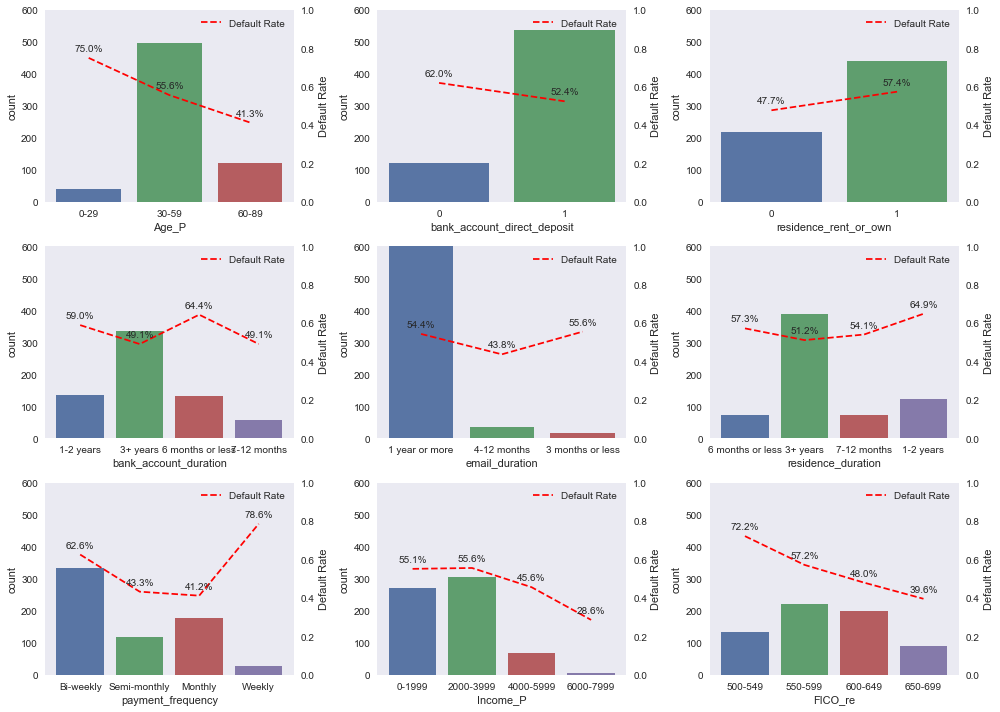

In [29]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,30,60,90]
group_names =['0-29','30-59','60-89']
loan['Age_P'] = pd.cut(loan['Age'],bins,labels=group_names)
draw_plot('Age_P')

plt.subplot(332)
draw_plot('bank_account_direct_deposit')

plt.subplot(333)
draw_plot('residence_rent_or_own')

plt.subplot(334)
draw_plot('bank_account_duration')

plt.subplot(335)
draw_plot('email_duration')

plt.subplot(336)
draw_plot('residence_duration')

plt.subplot(337)
draw_plot('payment_frequency')

plt.subplot(338)
bins = [0,2000,4000,6000,8000]
group_names =['0-1999','2000-3999','4000-5999','6000-7999']
loan['Income_P'] = pd.cut(loan['monthly_income_amount'],bins,labels=group_names)
draw_plot('Income_P')

plt.subplot(339)
bins = [500,550,600,650,700]
group_names =['500-549','550-599','600-649','650-699']
loan['FICO_re'] = pd.cut(loan['raw_FICO_retail'],bins,labels=group_names)
draw_plot('FICO_re')

plt.tight_layout()


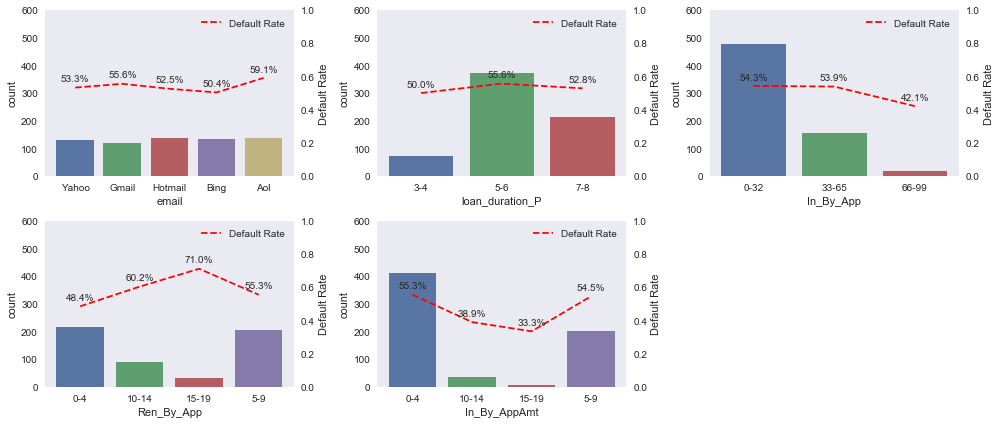

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(231)
draw_plot('email')

plt.subplot(232)
bins= [2,4,6,8]
group_names = ['3-4','5-6','7-8']
loan['loan_duration_P'] = pd.cut(loan['loan_duration'],bins,labels=group_names)
draw_plot('loan_duration_P')

plt.subplot(233)
bins = [0,33,66,100]
group_names =['0-32','33-65','66-99']
loan['In_By_App'] = pd.cut(loan['Income_By_AppPay'],bins,labels=group_names)
draw_plot('In_By_App')

plt.subplot(234)
bins = [0,5,10,15,20]
group_names =['0-4','5-9','10-14','15-19']
loan['Ren_By_App'] = pd.cut(loan['Rent_By_AppPay'],bins,labels=group_names)
draw_plot('Ren_By_App')

plt.subplot(235)
bins = [0,5,10,15,20]
group_names =['0-4','5-9','10-14','15-19']
loan['In_By_AppAmt'] = pd.cut(loan['Income_By_AppAmt'],bins,labels=group_names)
draw_plot('In_By_AppAmt')

plt.tight_layout()

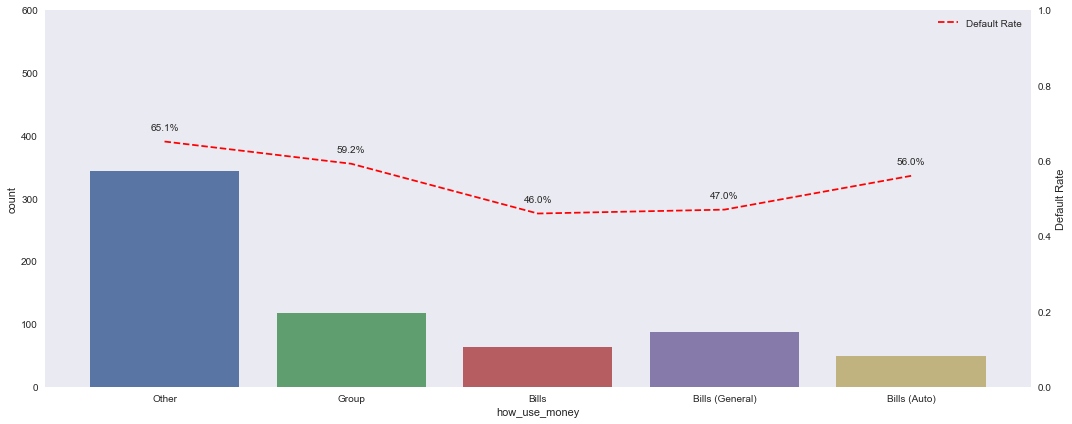

In [32]:
plt.figure(figsize=(15, 6))
draw_plot('how_use_money')
plt.tight_layout()

#### Correlation Heatmap

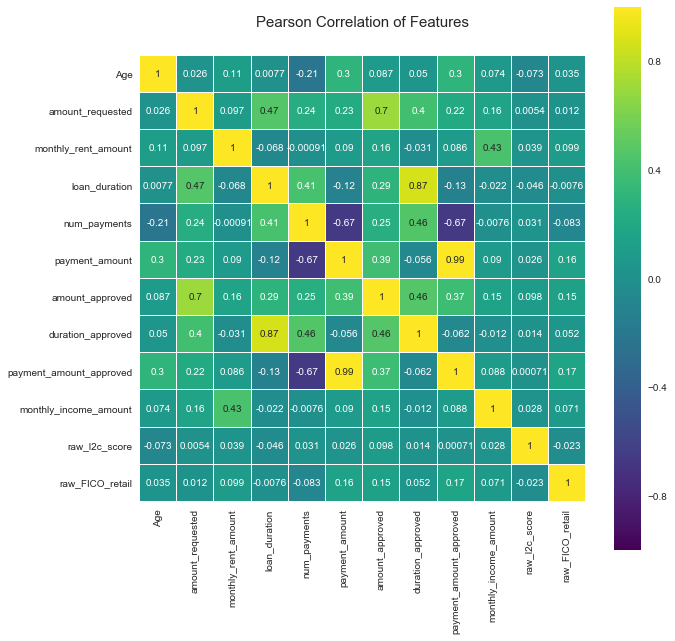

In [33]:
# Calculate Correlation and Draw Correlation Heatmap
loan_int = loan[['Age','amount_requested','monthly_rent_amount','loan_duration','num_payments','payment_amount','amount_approved'
                ,'duration_approved','payment_amount_approved','monthly_income_amount','raw_l2c_score','raw_FICO_retail']]

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(loan_int.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

### Algorithms Selection <a name='Algorithm' />

In [95]:
loan = pd.read_csv('loan.csv')

In [96]:
X = loan.ix[:,loan.columns != 'flgGood']
Y = loan['flgGood']

/Users/Frank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


#### Logistic Regression

In [97]:
# Scale numeric non-dummy features
from sklearn.preprocessing import scale

scale_list= ['amount_requested','monthly_rent_amount','loan_duration','num_payments','amount_approved','duration_approved','payment_amount_approved','monthly_income_amount',
'raw_l2c_score','raw_FICO_telecom','raw_FICO_retail','raw_FICO_bank_card','raw_FICO_money','Loans_Num','Age','Income_By_AppPay',
'Rent_By_AppPay','Income_By_AppAmt']

for i in scale_list:
    X[i] = scale(X[i])

In [100]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_auc_score


# Split the data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=3)

## regularization parametera
C = [0.03,0.09,0.27,0.81,1.0,3.0,9.0,27.0,81.0,243.0]

for i in C:
    model = LogisticRegression(C=i) # Create a logistic regression class object
    model.fit(X_train,Y_train) # Train the model
    Y_pred = model.predict(X_test) # Prediction from X_test
    prob = model.predict_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 65.930%
AUC score for C=0.090 is: 65.371%
AUC score for C=0.270 is: 65.136%
AUC score for C=0.810 is: 64.860%
AUC score for C=1.000 is: 64.857%
AUC score for C=3.000 is: 65.029%
AUC score for C=9.000 is: 65.382%
AUC score for C=27.000 is: 65.574%
AUC score for C=81.000 is: 65.688%
AUC score for C=243.000 is: 65.853%


In [101]:
# Drop high correlated features and test performance
X.drop(['amount_requested','loan_duration','payment_amount'],1,inplace=True)

# Split the data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=3)

## regularization parameter
C = [0.03,0.09,0.27,0.81,1.0,3.0,9.0,27.0,81.0,243.0]

for i in C:
    model = LogisticRegression(C=i) # Create a logistic regression class object
    model.fit(X_train,Y_train) # Train the model
    Y_pred = model.predict(X_test) # Prediction from X_test
    prob = model.predict_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 65.676%
AUC score for C=0.090 is: 65.103%
AUC score for C=0.270 is: 64.897%
AUC score for C=0.810 is: 64.643%
AUC score for C=1.000 is: 64.706%
AUC score for C=3.000 is: 64.801%
AUC score for C=9.000 is: 65.059%
AUC score for C=27.000 is: 65.195%
AUC score for C=81.000 is: 65.279%
AUC score for C=243.000 is: 65.316%


/Users/Frank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### The performance even drops after we delete some high correlated features, so we decide to keep those features.

In [102]:
X = loan.ix[:,loan.columns != 'flgGood']
Y = loan['flgGood']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=3)

In [103]:
X_train.shape

(329, 53)

In [104]:
# Feature Selection: compute ANOVA F-value and select features accordaing to the k highest features
k = [20,25,30,35,40,45,50]
for i in k:
    clf = LogisticRegression(C=243.0)
    filter1 = SelectKBest(f_classif, k=i)
    pipe = Pipeline([('anova', filter1), ('logistic', clf)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    prob = pipe.predict_proba(X_test)
    pipe.predict_log_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for k={0:d} is: {1:.3%}'.format(i,score)

AUC score for k=20 is: 66.188%
AUC score for k=25 is: 68.412%
AUC score for k=30 is: 67.136%
AUC score for k=35 is: 66.676%
AUC score for k=40 is: 66.283%
AUC score for k=45 is: 65.055%
AUC score for k=50 is: 63.768%


In [105]:
# Create new dataframe with only desired columns
clf = LogisticRegression(C=243.0)
filter1 = SelectKBest(f_classif, k=25)
pipe = Pipeline([('anova', filter1), ('logistic', clf)])
pipe.fit(X_train, Y_train)

idxs_selected = filter1.get_support(indices=True)
features_new = X.columns[idxs_selected]
print features_new

Index([u'amount_requested', u'residence_rent_or_own', u'num_payments',
       u'payment_amount', u'duration_approved', u'payment_amount_approved',
       u'raw_l2c_score', u'raw_FICO_telecom', u'raw_FICO_retail',
       u'raw_FICO_bank_card', u'raw_FICO_money', u'Loans_Num', u'Age',
       u'residence_duration_7-12 months', u'bank_account_duration_1-2 years',
       u'bank_account_duration_3+ years',
       u'bank_account_duration_6 months or less',
       u'bank_account_duration_7-12 months', u'payment_frequency_Bi-weekly',
       u'payment_frequency_Monthly', u'payment_frequency_Semi-monthly',
       u'payment_frequency_Weekly', u'other_phone_type_Mobile',
       u'how_use_money_Bills', u'how_use_money_Bills (General)'],
      dtype='object')


#### Gaussian Naive Bayes


In [106]:
from sklearn.naive_bayes import GaussianNB

# Fit the training model
NB = GaussianNB()
NB.fit(X_train,Y_train)

# Prediction from X_test
Y_pred = NB.predict(X_test)
prob = NB.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score for is: {0:.3%}'.format(score)

AUC score for is: 68.379%


#### Support Vector Machine with Gaussian Kernel

In [107]:
from sklearn import svm

## regularization parameter
C = [0.03,0.09,0.27,0.81,1.0,3.0]

## SVM with a Gaussian kernel
for i in C:
    rbf_svc = svm.SVC(kernel='rbf',C=i,probability=True).fit(X_train,Y_train)
    prob = rbf_svc.predict_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 51.875%
AUC score for C=0.090 is: 51.875%
AUC score for C=0.270 is: 48.125%
AUC score for C=0.810 is: 47.812%
AUC score for C=1.000 is: 51.875%
AUC score for C=3.000 is: 51.875%
